### Case#02 Estimation of the SBP and DBP using ECG and Bioimpedence Signals

In [164]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Acess the dataset

In [165]:
import pandas as pd

# Define the file path (update the path as needed)
file_path = "/content/drive/MyDrive/24_Patient_Project_ECG_PPG_Bio/final_ECG+PPG+Bio/Case_2_ECG_Bio/Case_2_ECG_Bio_final.csv"  # Replace with your actual file path

# Read the CSV file
df = pd.read_csv(file_path)
df


,R_Peak_time,PAT_Max,Bio_Peak_time,Bio_Peak_amplitude,R_Peak_amplitude,Pulse_Interval(ms),R_R_Interval,Heart_Rate(bpm),Systolic_blood_pressure (mmHg),Diastolic_blood_pressure (mmHg),...,Pulse_Pressure(mmHg),Stroke_Volume(ml),Cardiac_Output (L/min),Subject,Age,Height(cm),Weight(kg),Gender,Posture,Session
0,2017-10-11 18:09:52.473,234.000,2017-10-11 18:09:52.707,-93.352,21.937,878.000,644.000,93,120,78,...,42,54.096,5.031,1,44,165,100,Female,Handgrip,1
1,2017-10-11 18:09:53.113,535.000,2017-10-11 18:09:53.648,-54.738,16.821,941.000,640.000,93,83,52,...,31,39.680,3.690,1,44,165,100,Female,Handgrip,1
2,2017-10-11 18:09:53.765,328.000,2017-10-11 18:09:54.093,197.768,22.513,445.000,652.000,92,101,65,...,36,46.944,4.319,1,44,165,100,Female,Handgrip,1
3,2017-10-11 18:09:55.095,279.000,2017-10-11 18:09:55.374,88.273,22.542,747.000,520.000,115,109,71,...,38,39.520,4.545,1,44,165,100,Female,Handgrip,1
4,2017-10-11 18:09:55.762,510.000,2017-10-11 18:09:56.272,143.397,21.878,898.000,667.000,89,84,53,...,31,41.354,3.681,1,44,165,100,Female,Handgrip,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12876,2017-11-15 15:39:51.761,454.000,2017-11-15 15:39:52.215,115.180,33.019,984.000,779.000,77,89,56,...,33,51.414,3.959,12,58,175,83,Female,R_Rest,5
12877,2017-11-15 15:39:52.373,290.000,2017-11-15 15:39:52.663,271.369,36.333,448.000,612.000,98,106,69,...,37,45.288,4.438,12,58,175,83,Female,R_Rest,5
12878,2017-11-15 15:39:53.079,231.000,2017-11-15 15:39:53.310,291.205,35.488,647.000,706.000,84,119,77,...,42,59.304,4.982,12,58,175,83,Female,R_Rest,5
12879,2017-11-15 15:39:53.785,496.000,2017-11-15 15:39:54.281,213.672,30.598,971.000,706.000,84,86,54,...,32,45.184,3.795,12,58,175,83,Female,R_Rest,5


In [166]:
df.shape

(12881, 21)

In [167]:
df.columns

Index(['R_Peak_time', 'PAT_Max', 'Bio_Peak_time', 'Bio_Peak_amplitude',
       'R_Peak_amplitude', 'Pulse_Interval(ms)', 'R_R_Interval',
       'Heart_Rate(bpm)', 'Systolic_blood_pressure (mmHg)',
       'Diastolic_blood_pressure (mmHg)', 'Mean (mmHg)',
       'Pulse_Pressure(mmHg)', 'Stroke_Volume(ml)', 'Cardiac_Output (L/min)',
       'Subject', 'Age', 'Height(cm)', 'Weight(kg)', 'Gender', 'Posture',
       'Session'],
      dtype='object')

In [168]:
df.dtypes

,0
R_Peak_time,object
PAT_Max,float64
Bio_Peak_time,object
Bio_Peak_amplitude,float64
R_Peak_amplitude,float64
Pulse_Interval(ms),float64
R_R_Interval,float64
Heart_Rate(bpm),int64
Systolic_blood_pressure (mmHg),int64
Diastolic_blood_pressure (mmHg),int64


### check Unique values of the each column

In [169]:
#Loop through each column and print the unique values
for column in df.columns:
    unique_values = df[column].unique()
    count_values  = len(df[column].unique())
    print(f"Column: {column}")
    #print(f"Unique Values: {unique_values}\n")
    print(f"total count unique values : { count_values}\n")

Column: R_Peak_time
total count unique values : 12827

Column: PAT_Max
total count unique values : 499

Column: Bio_Peak_time
total count unique values : 12827

Column: Bio_Peak_amplitude
total count unique values : 12827

Column: R_Peak_amplitude
total count unique values : 12827

Column: Pulse_Interval(ms)
total count unique values : 771

Column: R_R_Interval
total count unique values : 670

Column: Heart_Rate(bpm)
total count unique values : 141

Column: Systolic_blood_pressure (mmHg)
total count unique values : 71

Column: Diastolic_blood_pressure (mmHg)
total count unique values : 51

Column: Mean (mmHg)
total count unique values : 61

Column: Pulse_Pressure(mmHg)
total count unique values : 22

Column: Stroke_Volume(ml)
total count unique values : 5086

Column: Cardiac_Output (L/min)
total count unique values : 4468

Column: Subject
total count unique values : 12

Column: Age
total count unique values : 12

Column: Height(cm)
total count unique values : 9

Column: Weight(kg)
tota

### check the skewness of the data

In [170]:
# Calculate skewness for each numeric column in the DataFrame and print the result
numeric_columns = df.select_dtypes(include=['number'])  # Select only numeric columns
for column in numeric_columns.columns:
    skew_value = df[column].skew()
    print(f"Skewness of '{column}': {skew_value:.4f}")

Skewness of 'PAT_Max': 1.0897
Skewness of 'Bio_Peak_amplitude': 0.8482
Skewness of 'R_Peak_amplitude': 1.1481
Skewness of 'Pulse_Interval(ms)': -0.1656
Skewness of 'R_R_Interval': -0.1508
Skewness of 'Heart_Rate(bpm)': 1.6594
Skewness of 'Systolic_blood_pressure (mmHg)': -0.0866
Skewness of 'Diastolic_blood_pressure (mmHg)': -0.0852
Skewness of 'Mean (mmHg)': -0.0852
Skewness of 'Pulse_Pressure(mmHg)': -0.0894
Skewness of 'Stroke_Volume(ml)': -0.0459
Skewness of 'Cardiac_Output (L/min)': -0.0855
Skewness of 'Subject': 0.0801
Skewness of 'Age': -0.2278
Skewness of 'Height(cm)': -1.0019
Skewness of 'Weight(kg)': 0.5182
Skewness of 'Session': -0.3319


In [171]:
df

,R_Peak_time,PAT_Max,Bio_Peak_time,Bio_Peak_amplitude,R_Peak_amplitude,Pulse_Interval(ms),R_R_Interval,Heart_Rate(bpm),Systolic_blood_pressure (mmHg),Diastolic_blood_pressure (mmHg),...,Pulse_Pressure(mmHg),Stroke_Volume(ml),Cardiac_Output (L/min),Subject,Age,Height(cm),Weight(kg),Gender,Posture,Session
0,2017-10-11 18:09:52.473,234.000,2017-10-11 18:09:52.707,-93.352,21.937,878.000,644.000,93,120,78,...,42,54.096,5.031,1,44,165,100,Female,Handgrip,1
1,2017-10-11 18:09:53.113,535.000,2017-10-11 18:09:53.648,-54.738,16.821,941.000,640.000,93,83,52,...,31,39.680,3.690,1,44,165,100,Female,Handgrip,1
2,2017-10-11 18:09:53.765,328.000,2017-10-11 18:09:54.093,197.768,22.513,445.000,652.000,92,101,65,...,36,46.944,4.319,1,44,165,100,Female,Handgrip,1
3,2017-10-11 18:09:55.095,279.000,2017-10-11 18:09:55.374,88.273,22.542,747.000,520.000,115,109,71,...,38,39.520,4.545,1,44,165,100,Female,Handgrip,1
4,2017-10-11 18:09:55.762,510.000,2017-10-11 18:09:56.272,143.397,21.878,898.000,667.000,89,84,53,...,31,41.354,3.681,1,44,165,100,Female,Handgrip,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12876,2017-11-15 15:39:51.761,454.000,2017-11-15 15:39:52.215,115.180,33.019,984.000,779.000,77,89,56,...,33,51.414,3.959,12,58,175,83,Female,R_Rest,5
12877,2017-11-15 15:39:52.373,290.000,2017-11-15 15:39:52.663,271.369,36.333,448.000,612.000,98,106,69,...,37,45.288,4.438,12,58,175,83,Female,R_Rest,5
12878,2017-11-15 15:39:53.079,231.000,2017-11-15 15:39:53.310,291.205,35.488,647.000,706.000,84,119,77,...,42,59.304,4.982,12,58,175,83,Female,R_Rest,5
12879,2017-11-15 15:39:53.785,496.000,2017-11-15 15:39:54.281,213.672,30.598,971.000,706.000,84,86,54,...,32,45.184,3.795,12,58,175,83,Female,R_Rest,5


### check Outliers

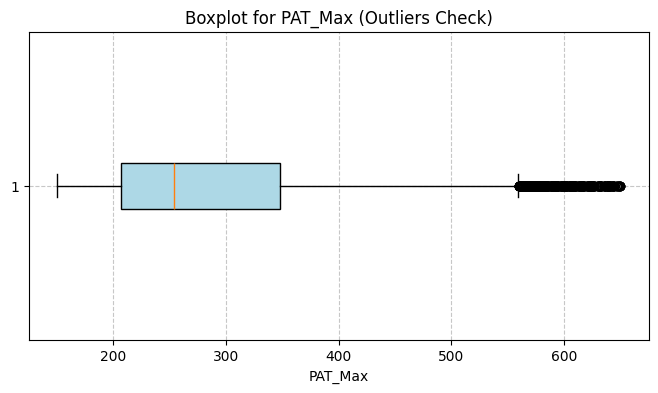

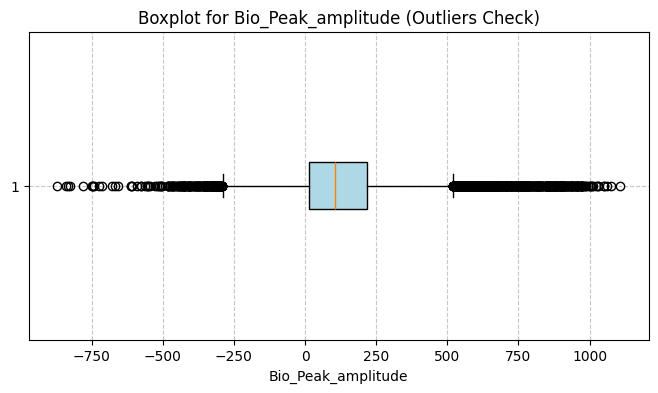

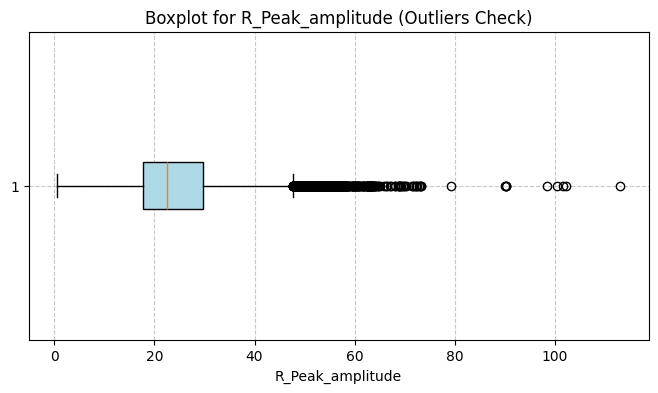

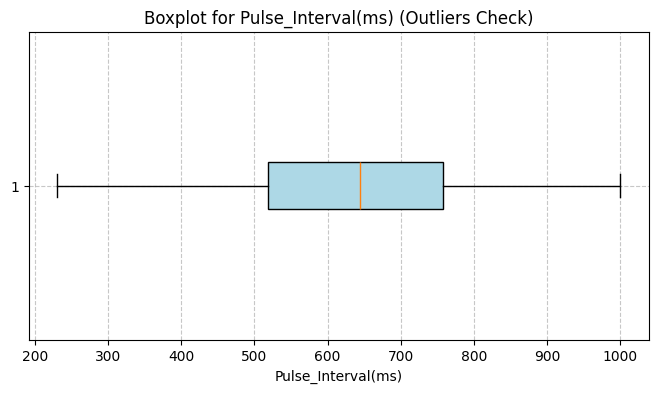

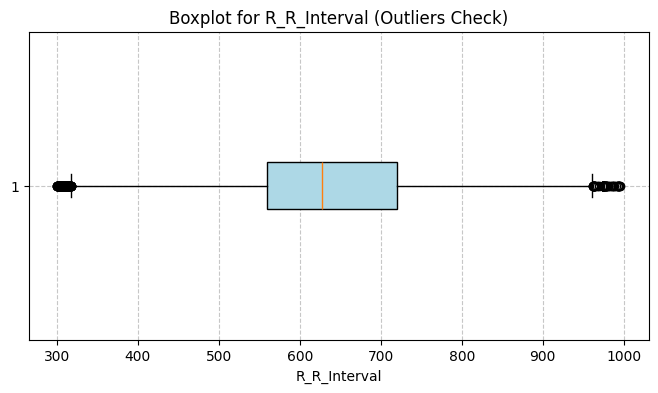

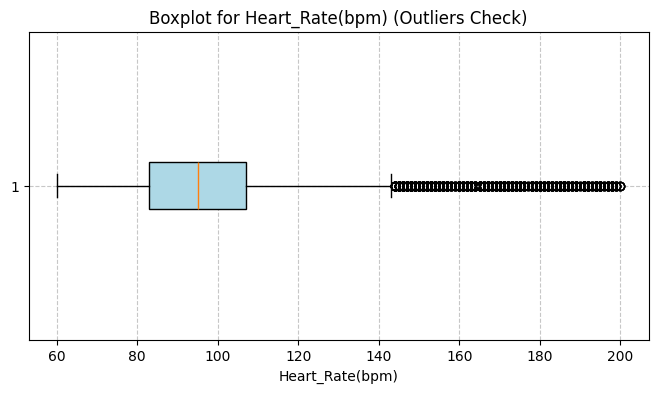

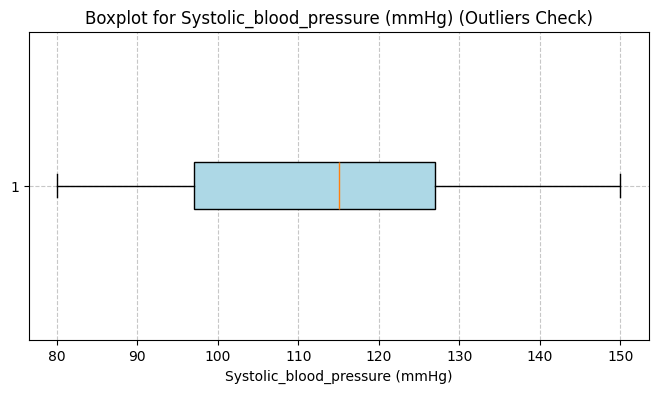

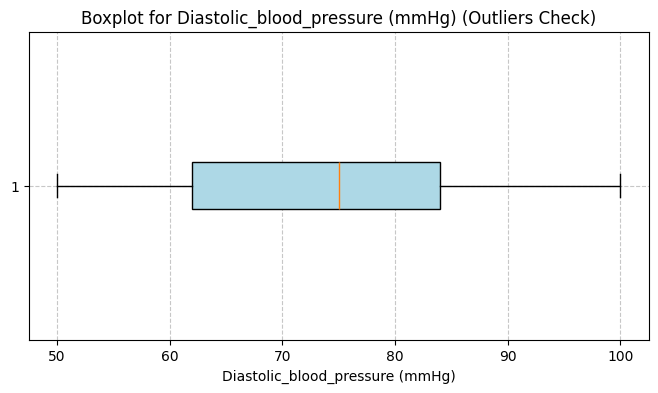

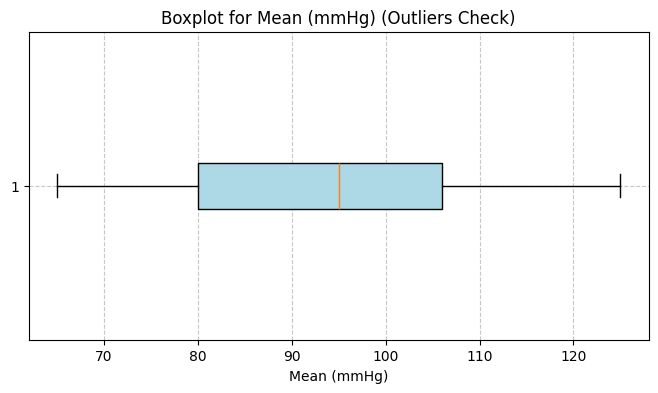

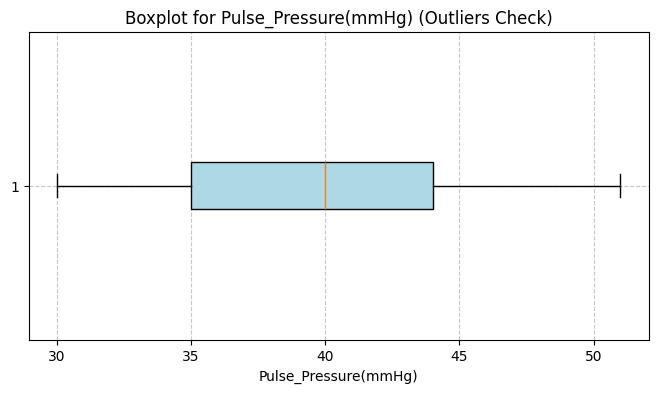

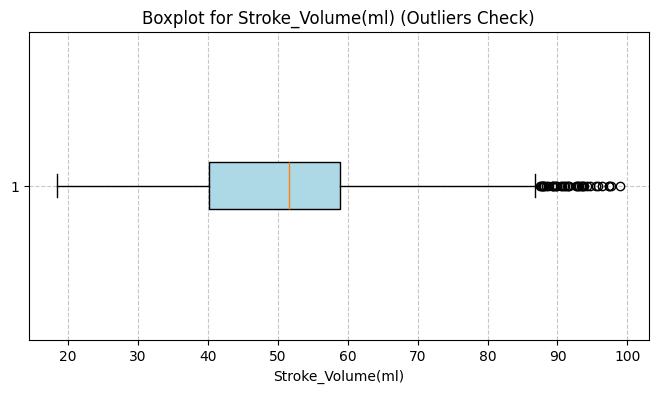

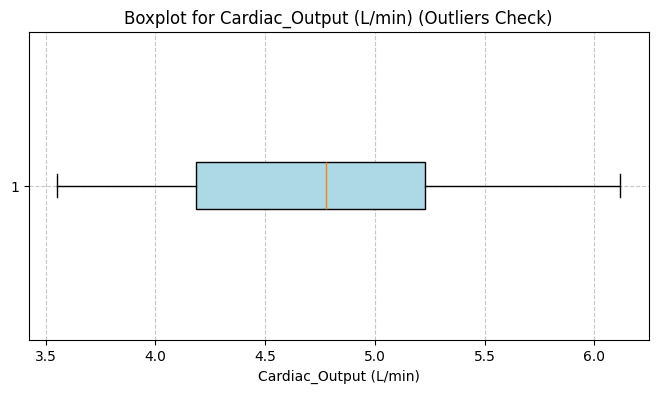

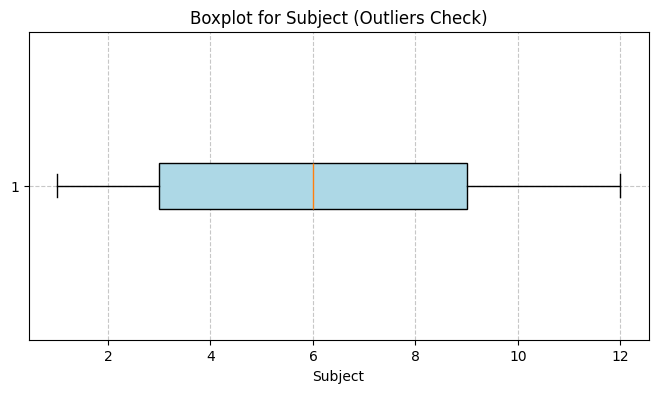

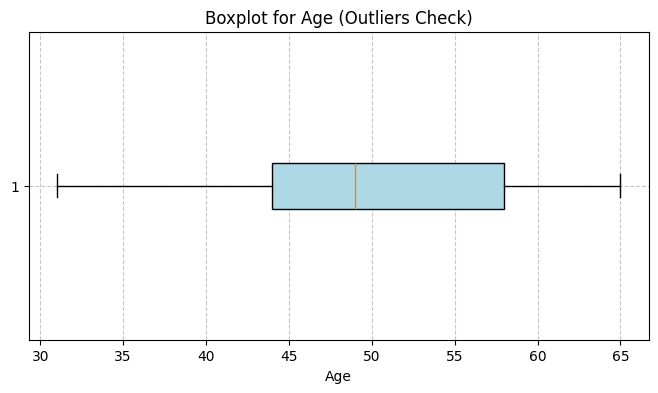

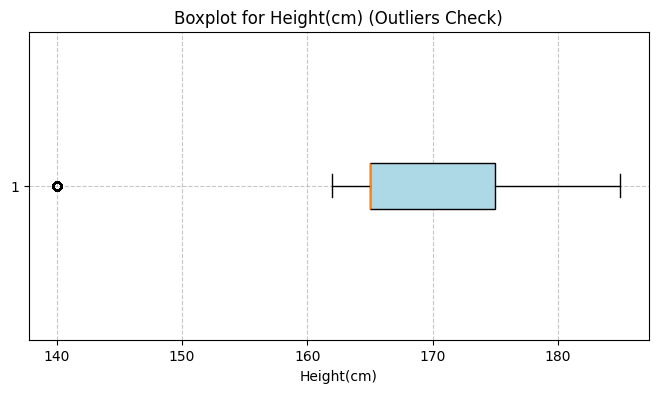

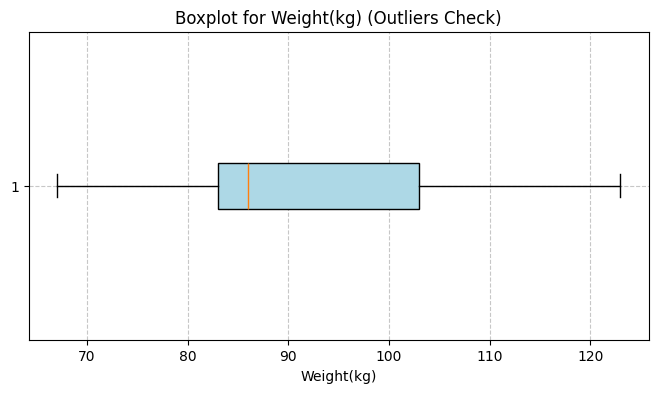

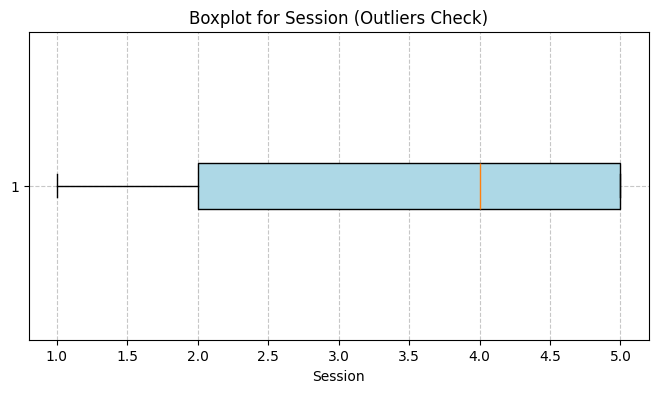

In [172]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (Assuming df is already loaded)
# df = pd.read_csv('your_dataset.csv')  # Uncomment if loading from a file

# Function to plot outliers for all numeric columns using boxplots
def plot_outliers(df):
    numeric_columns = df.select_dtypes(include=['number']).columns

    for column in numeric_columns:
        plt.figure(figsize=(8, 4))
        plt.boxplot(df[column].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
        plt.title(f'Boxplot for {column} (Outliers Check)')
        plt.xlabel(column)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()

# Display outliers for all columns
plot_outliers(df)


### check data_types of the columns

In [173]:
df.dtypes

,0
R_Peak_time,object
PAT_Max,float64
Bio_Peak_time,object
Bio_Peak_amplitude,float64
R_Peak_amplitude,float64
Pulse_Interval(ms),float64
R_R_Interval,float64
Heart_Rate(bpm),int64
Systolic_blood_pressure (mmHg),int64
Diastolic_blood_pressure (mmHg),int64


### object column values is converted into numericals

In [174]:
print(df['Posture'].unique())

['Handgrip' 'L_Cycling' 'L_Rest' 'M_Cycling' 'M_Rest' 'HV_Cycling'
 'HV_Rest' 'R_Rest']


In [175]:
import pandas as pd

# Sample DataFrame 'df'
# Assuming 'df' is your dataset

# Check current 'Gender' values (just for understanding)
print(df['Posture'].unique())

# Map 'Gender' values to integers (e.g., 'Male' -> 1, 'Female' -> 0)
df['Posture'] = df['Posture'].map({'Handgrip': 1, 'L_Cycling': 2, 'L_Rest':3,'M_Cycling':4,
                                  'M_Rest':5,'HV_Cycling':6,'HV_Rest':7,'R_Rest':8})

# If there are other categories or missing values, you may need to handle them
# For example, mapping 'Other' or NaN values to a default integer (e.g., -1)
df['Posture'] = df['Posture'].fillna(-1).astype('int64')

# Display the updated DataFrame and check the datatype of 'Gender'
#print(df.dtypes)
print(df['Posture'].head())

['Handgrip' 'L_Cycling' 'L_Rest' 'M_Cycling' 'M_Rest' 'HV_Cycling'
 'HV_Rest' 'R_Rest']
0    1
1    1
2    1
3    1
4    1
Name: Posture, dtype: int64


In [176]:
df

,R_Peak_time,PAT_Max,Bio_Peak_time,Bio_Peak_amplitude,R_Peak_amplitude,Pulse_Interval(ms),R_R_Interval,Heart_Rate(bpm),Systolic_blood_pressure (mmHg),Diastolic_blood_pressure (mmHg),...,Pulse_Pressure(mmHg),Stroke_Volume(ml),Cardiac_Output (L/min),Subject,Age,Height(cm),Weight(kg),Gender,Posture,Session
0,2017-10-11 18:09:52.473,234.000,2017-10-11 18:09:52.707,-93.352,21.937,878.000,644.000,93,120,78,...,42,54.096,5.031,1,44,165,100,Female,1,1
1,2017-10-11 18:09:53.113,535.000,2017-10-11 18:09:53.648,-54.738,16.821,941.000,640.000,93,83,52,...,31,39.680,3.690,1,44,165,100,Female,1,1
2,2017-10-11 18:09:53.765,328.000,2017-10-11 18:09:54.093,197.768,22.513,445.000,652.000,92,101,65,...,36,46.944,4.319,1,44,165,100,Female,1,1
3,2017-10-11 18:09:55.095,279.000,2017-10-11 18:09:55.374,88.273,22.542,747.000,520.000,115,109,71,...,38,39.520,4.545,1,44,165,100,Female,1,1
4,2017-10-11 18:09:55.762,510.000,2017-10-11 18:09:56.272,143.397,21.878,898.000,667.000,89,84,53,...,31,41.354,3.681,1,44,165,100,Female,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12876,2017-11-15 15:39:51.761,454.000,2017-11-15 15:39:52.215,115.180,33.019,984.000,779.000,77,89,56,...,33,51.414,3.959,12,58,175,83,Female,8,5
12877,2017-11-15 15:39:52.373,290.000,2017-11-15 15:39:52.663,271.369,36.333,448.000,612.000,98,106,69,...,37,45.288,4.438,12,58,175,83,Female,8,5
12878,2017-11-15 15:39:53.079,231.000,2017-11-15 15:39:53.310,291.205,35.488,647.000,706.000,84,119,77,...,42,59.304,4.982,12,58,175,83,Female,8,5
12879,2017-11-15 15:39:53.785,496.000,2017-11-15 15:39:54.281,213.672,30.598,971.000,706.000,84,86,54,...,32,45.184,3.795,12,58,175,83,Female,8,5


In [177]:
import pandas as pd

# Sample DataFrame 'df'
# Assuming 'df' is your dataset

# Check current 'Gender' values (just for understanding)
print(df['Gender'].unique())

# Map 'Gender' values to integers (e.g., 'Male' -> 1, 'Female' -> 0)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# If there are other categories or missing values, you may need to handle them
# For example, mapping 'Other' or NaN values to a default integer (e.g., -1)
df['Gender'] = df['Gender'].fillna(-1).astype('int64')

# Display the updated DataFrame and check the datatype of 'Gender'
#print(df.dtypes)
print(df['Gender'].head())

['Female' 'Male']
0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: int64


In [178]:
df

,R_Peak_time,PAT_Max,Bio_Peak_time,Bio_Peak_amplitude,R_Peak_amplitude,Pulse_Interval(ms),R_R_Interval,Heart_Rate(bpm),Systolic_blood_pressure (mmHg),Diastolic_blood_pressure (mmHg),...,Pulse_Pressure(mmHg),Stroke_Volume(ml),Cardiac_Output (L/min),Subject,Age,Height(cm),Weight(kg),Gender,Posture,Session
0,2017-10-11 18:09:52.473,234.000,2017-10-11 18:09:52.707,-93.352,21.937,878.000,644.000,93,120,78,...,42,54.096,5.031,1,44,165,100,0,1,1
1,2017-10-11 18:09:53.113,535.000,2017-10-11 18:09:53.648,-54.738,16.821,941.000,640.000,93,83,52,...,31,39.680,3.690,1,44,165,100,0,1,1
2,2017-10-11 18:09:53.765,328.000,2017-10-11 18:09:54.093,197.768,22.513,445.000,652.000,92,101,65,...,36,46.944,4.319,1,44,165,100,0,1,1
3,2017-10-11 18:09:55.095,279.000,2017-10-11 18:09:55.374,88.273,22.542,747.000,520.000,115,109,71,...,38,39.520,4.545,1,44,165,100,0,1,1
4,2017-10-11 18:09:55.762,510.000,2017-10-11 18:09:56.272,143.397,21.878,898.000,667.000,89,84,53,...,31,41.354,3.681,1,44,165,100,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12876,2017-11-15 15:39:51.761,454.000,2017-11-15 15:39:52.215,115.180,33.019,984.000,779.000,77,89,56,...,33,51.414,3.959,12,58,175,83,0,8,5
12877,2017-11-15 15:39:52.373,290.000,2017-11-15 15:39:52.663,271.369,36.333,448.000,612.000,98,106,69,...,37,45.288,4.438,12,58,175,83,0,8,5
12878,2017-11-15 15:39:53.079,231.000,2017-11-15 15:39:53.310,291.205,35.488,647.000,706.000,84,119,77,...,42,59.304,4.982,12,58,175,83,0,8,5
12879,2017-11-15 15:39:53.785,496.000,2017-11-15 15:39:54.281,213.672,30.598,971.000,706.000,84,86,54,...,32,45.184,3.795,12,58,175,83,0,8,5


### Convert Timestamps & Format Output Properly
### R_Peak_time ,PPG_Peak_time , foot_idx_time and its type is numeric

In [179]:
import pandas as pd


# Convert to datetime format
df['R_Peak_time'] = pd.to_datetime(df['R_Peak_time'])

# Convert datetime to UNIX timestamp (seconds with milliseconds)
df['R_Peak_timestamp'] = df['R_Peak_time'].astype(int) / 10**9  # Convert to seconds with milliseconds

# Format R_Peak_time to keep the original format
df['R_Peak_time'] = df['R_Peak_time'].dt.strftime('%Y-%m-%d %H:%M:%S.%f').str[:-3]  # Keep milliseconds

# Ensure full numeric format without scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)




In [180]:
df

,R_Peak_time,PAT_Max,Bio_Peak_time,Bio_Peak_amplitude,R_Peak_amplitude,Pulse_Interval(ms),R_R_Interval,Heart_Rate(bpm),Systolic_blood_pressure (mmHg),Diastolic_blood_pressure (mmHg),...,Stroke_Volume(ml),Cardiac_Output (L/min),Subject,Age,Height(cm),Weight(kg),Gender,Posture,Session,R_Peak_timestamp
0,2017-10-11 18:09:52.473,234.000,2017-10-11 18:09:52.707,-93.352,21.937,878.000,644.000,93,120,78,...,54.096,5.031,1,44,165,100,0,1,1,1507745392.473
1,2017-10-11 18:09:53.113,535.000,2017-10-11 18:09:53.648,-54.738,16.821,941.000,640.000,93,83,52,...,39.680,3.690,1,44,165,100,0,1,1,1507745393.113
2,2017-10-11 18:09:53.765,328.000,2017-10-11 18:09:54.093,197.768,22.513,445.000,652.000,92,101,65,...,46.944,4.319,1,44,165,100,0,1,1,1507745393.765
3,2017-10-11 18:09:55.095,279.000,2017-10-11 18:09:55.374,88.273,22.542,747.000,520.000,115,109,71,...,39.520,4.545,1,44,165,100,0,1,1,1507745395.095
4,2017-10-11 18:09:55.762,510.000,2017-10-11 18:09:56.272,143.397,21.878,898.000,667.000,89,84,53,...,41.354,3.681,1,44,165,100,0,1,1,1507745395.762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12876,2017-11-15 15:39:51.761,454.000,2017-11-15 15:39:52.215,115.180,33.019,984.000,779.000,77,89,56,...,51.414,3.959,12,58,175,83,0,8,5,1510760391.761
12877,2017-11-15 15:39:52.373,290.000,2017-11-15 15:39:52.663,271.369,36.333,448.000,612.000,98,106,69,...,45.288,4.438,12,58,175,83,0,8,5,1510760392.373
12878,2017-11-15 15:39:53.079,231.000,2017-11-15 15:39:53.310,291.205,35.488,647.000,706.000,84,119,77,...,59.304,4.982,12,58,175,83,0,8,5,1510760393.079
12879,2017-11-15 15:39:53.785,496.000,2017-11-15 15:39:54.281,213.672,30.598,971.000,706.000,84,86,54,...,45.184,3.795,12,58,175,83,0,8,5,1510760393.785


In [181]:
df.columns

Index(['R_Peak_time', 'PAT_Max', 'Bio_Peak_time', 'Bio_Peak_amplitude',
       'R_Peak_amplitude', 'Pulse_Interval(ms)', 'R_R_Interval',
       'Heart_Rate(bpm)', 'Systolic_blood_pressure (mmHg)',
       'Diastolic_blood_pressure (mmHg)', 'Mean (mmHg)',
       'Pulse_Pressure(mmHg)', 'Stroke_Volume(ml)', 'Cardiac_Output (L/min)',
       'Subject', 'Age', 'Height(cm)', 'Weight(kg)', 'Gender', 'Posture',
       'Session', 'R_Peak_timestamp'],
      dtype='object')

In [182]:
# Convert to datetime format
df['Bio_Peak_time'] = pd.to_datetime(df['Bio_Peak_time'])

# Convert datetime to UNIX timestamp (seconds with milliseconds)
df['Bio_Peak_timestamp'] = df['Bio_Peak_time'].astype(int) / 10**9  # Convert to seconds with milliseconds

# Format R_Peak_time to keep the original format
df['Bio_Peak_time'] = df['Bio_Peak_time'].dt.strftime('%Y-%m-%d %H:%M:%S.%f').str[:-3]  # Keep milliseconds

# Ensure full numeric format without scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [183]:
df

,R_Peak_time,PAT_Max,Bio_Peak_time,Bio_Peak_amplitude,R_Peak_amplitude,Pulse_Interval(ms),R_R_Interval,Heart_Rate(bpm),Systolic_blood_pressure (mmHg),Diastolic_blood_pressure (mmHg),...,Cardiac_Output (L/min),Subject,Age,Height(cm),Weight(kg),Gender,Posture,Session,R_Peak_timestamp,Bio_Peak_timestamp
0,2017-10-11 18:09:52.473,234.000,2017-10-11 18:09:52.707,-93.352,21.937,878.000,644.000,93,120,78,...,5.031,1,44,165,100,0,1,1,1507745392.473,1507745392.707
1,2017-10-11 18:09:53.113,535.000,2017-10-11 18:09:53.648,-54.738,16.821,941.000,640.000,93,83,52,...,3.690,1,44,165,100,0,1,1,1507745393.113,1507745393.648
2,2017-10-11 18:09:53.765,328.000,2017-10-11 18:09:54.093,197.768,22.513,445.000,652.000,92,101,65,...,4.319,1,44,165,100,0,1,1,1507745393.765,1507745394.093
3,2017-10-11 18:09:55.095,279.000,2017-10-11 18:09:55.374,88.273,22.542,747.000,520.000,115,109,71,...,4.545,1,44,165,100,0,1,1,1507745395.095,1507745395.374
4,2017-10-11 18:09:55.762,510.000,2017-10-11 18:09:56.272,143.397,21.878,898.000,667.000,89,84,53,...,3.681,1,44,165,100,0,1,1,1507745395.762,1507745396.272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12876,2017-11-15 15:39:51.761,454.000,2017-11-15 15:39:52.215,115.180,33.019,984.000,779.000,77,89,56,...,3.959,12,58,175,83,0,8,5,1510760391.761,1510760392.215
12877,2017-11-15 15:39:52.373,290.000,2017-11-15 15:39:52.663,271.369,36.333,448.000,612.000,98,106,69,...,4.438,12,58,175,83,0,8,5,1510760392.373,1510760392.663
12878,2017-11-15 15:39:53.079,231.000,2017-11-15 15:39:53.310,291.205,35.488,647.000,706.000,84,119,77,...,4.982,12,58,175,83,0,8,5,1510760393.079,1510760393.310
12879,2017-11-15 15:39:53.785,496.000,2017-11-15 15:39:54.281,213.672,30.598,971.000,706.000,84,86,54,...,3.795,12,58,175,83,0,8,5,1510760393.785,1510760394.281


In [184]:
df

,R_Peak_time,PAT_Max,Bio_Peak_time,Bio_Peak_amplitude,R_Peak_amplitude,Pulse_Interval(ms),R_R_Interval,Heart_Rate(bpm),Systolic_blood_pressure (mmHg),Diastolic_blood_pressure (mmHg),...,Cardiac_Output (L/min),Subject,Age,Height(cm),Weight(kg),Gender,Posture,Session,R_Peak_timestamp,Bio_Peak_timestamp
0,2017-10-11 18:09:52.473,234.000,2017-10-11 18:09:52.707,-93.352,21.937,878.000,644.000,93,120,78,...,5.031,1,44,165,100,0,1,1,1507745392.473,1507745392.707
1,2017-10-11 18:09:53.113,535.000,2017-10-11 18:09:53.648,-54.738,16.821,941.000,640.000,93,83,52,...,3.690,1,44,165,100,0,1,1,1507745393.113,1507745393.648
2,2017-10-11 18:09:53.765,328.000,2017-10-11 18:09:54.093,197.768,22.513,445.000,652.000,92,101,65,...,4.319,1,44,165,100,0,1,1,1507745393.765,1507745394.093
3,2017-10-11 18:09:55.095,279.000,2017-10-11 18:09:55.374,88.273,22.542,747.000,520.000,115,109,71,...,4.545,1,44,165,100,0,1,1,1507745395.095,1507745395.374
4,2017-10-11 18:09:55.762,510.000,2017-10-11 18:09:56.272,143.397,21.878,898.000,667.000,89,84,53,...,3.681,1,44,165,100,0,1,1,1507745395.762,1507745396.272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12876,2017-11-15 15:39:51.761,454.000,2017-11-15 15:39:52.215,115.180,33.019,984.000,779.000,77,89,56,...,3.959,12,58,175,83,0,8,5,1510760391.761,1510760392.215
12877,2017-11-15 15:39:52.373,290.000,2017-11-15 15:39:52.663,271.369,36.333,448.000,612.000,98,106,69,...,4.438,12,58,175,83,0,8,5,1510760392.373,1510760392.663
12878,2017-11-15 15:39:53.079,231.000,2017-11-15 15:39:53.310,291.205,35.488,647.000,706.000,84,119,77,...,4.982,12,58,175,83,0,8,5,1510760393.079,1510760393.310
12879,2017-11-15 15:39:53.785,496.000,2017-11-15 15:39:54.281,213.672,30.598,971.000,706.000,84,86,54,...,3.795,12,58,175,83,0,8,5,1510760393.785,1510760394.281


In [185]:
# Remove columns 'B' and 'D' permanently
df.drop(['R_Peak_time','Bio_Peak_time'], axis=1, inplace=True)

In [186]:
df

,PAT_Max,Bio_Peak_amplitude,R_Peak_amplitude,Pulse_Interval(ms),R_R_Interval,Heart_Rate(bpm),Systolic_blood_pressure (mmHg),Diastolic_blood_pressure (mmHg),Mean (mmHg),Pulse_Pressure(mmHg),...,Cardiac_Output (L/min),Subject,Age,Height(cm),Weight(kg),Gender,Posture,Session,R_Peak_timestamp,Bio_Peak_timestamp
0,234.000,-93.352,21.937,878.000,644.000,93,120,78,99,42,...,5.031,1,44,165,100,0,1,1,1507745392.473,1507745392.707
1,535.000,-54.738,16.821,941.000,640.000,93,83,52,68,31,...,3.690,1,44,165,100,0,1,1,1507745393.113,1507745393.648
2,328.000,197.768,22.513,445.000,652.000,92,101,65,83,36,...,4.319,1,44,165,100,0,1,1,1507745393.765,1507745394.093
3,279.000,88.273,22.542,747.000,520.000,115,109,71,90,38,...,4.545,1,44,165,100,0,1,1,1507745395.095,1507745395.374
4,510.000,143.397,21.878,898.000,667.000,89,84,53,68,31,...,3.681,1,44,165,100,0,1,1,1507745395.762,1507745396.272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12876,454.000,115.180,33.019,984.000,779.000,77,89,56,72,33,...,3.959,12,58,175,83,0,8,5,1510760391.761,1510760392.215
12877,290.000,271.369,36.333,448.000,612.000,98,106,69,88,37,...,4.438,12,58,175,83,0,8,5,1510760392.373,1510760392.663
12878,231.000,291.205,35.488,647.000,706.000,84,119,77,98,42,...,4.982,12,58,175,83,0,8,5,1510760393.079,1510760393.310
12879,496.000,213.672,30.598,971.000,706.000,84,86,54,70,32,...,3.795,12,58,175,83,0,8,5,1510760393.785,1510760394.281


In [187]:
# Remove columns 'B' and 'D' permanently
df.drop(['R_Peak_timestamp','Bio_Peak_timestamp'], axis=1, inplace=True)

In [188]:
df.dtypes

,0
PAT_Max,float64
Bio_Peak_amplitude,float64
R_Peak_amplitude,float64
Pulse_Interval(ms),float64
R_R_Interval,float64
Heart_Rate(bpm),int64
Systolic_blood_pressure (mmHg),int64
Diastolic_blood_pressure (mmHg),int64
Mean (mmHg),int64
Pulse_Pressure(mmHg),int64


In [ ]:
##check the Correlation of the features

#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns

# Compute the correlation matrix (only numeric columns)
#correlation_matrix = df.corr()

# Display the correlation matrix as a heatmap
#plt.figure(figsize=(12, 8))
#sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
#plt.title("Correlation Matrix Heatmap")
#plt.show()


In [190]:
df[['PAT_Max', 'Systolic_blood_pressure (mmHg)', 'Diastolic_blood_pressure (mmHg)']]

,PAT_Max,Systolic_blood_pressure (mmHg),Diastolic_blood_pressure (mmHg)
0,234.000,120,78
1,535.000,83,52
2,328.000,101,65
3,279.000,109,71
4,510.000,84,53
...,...,...,...
12876,454.000,89,56
12877,290.000,106,69
12878,231.000,119,77
12879,496.000,86,54


In [191]:
df.columns

Index(['PAT_Max', 'Bio_Peak_amplitude', 'R_Peak_amplitude',
       'Pulse_Interval(ms)', 'R_R_Interval', 'Heart_Rate(bpm)',
       'Systolic_blood_pressure (mmHg)', 'Diastolic_blood_pressure (mmHg)',
       'Mean (mmHg)', 'Pulse_Pressure(mmHg)', 'Stroke_Volume(ml)',
       'Cardiac_Output (L/min)', 'Subject', 'Age', 'Height(cm)', 'Weight(kg)',
       'Gender', 'Posture', 'Session'],
      dtype='object')

In [192]:
df.drop(['Mean (mmHg)','Cardiac_Output (L/min)','Pulse_Pressure(mmHg)'], axis=1, inplace=True)

### copy the dataset

In [193]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()

In [194]:
df1.drop(['Diastolic_blood_pressure (mmHg)'], axis=1, inplace=True)


### Systolic Blood Pressure using Linear Regression

In [195]:
X = df1.drop(['Systolic_blood_pressure (mmHg)'], axis=1)
Y = df1[['Systolic_blood_pressure (mmHg)']]

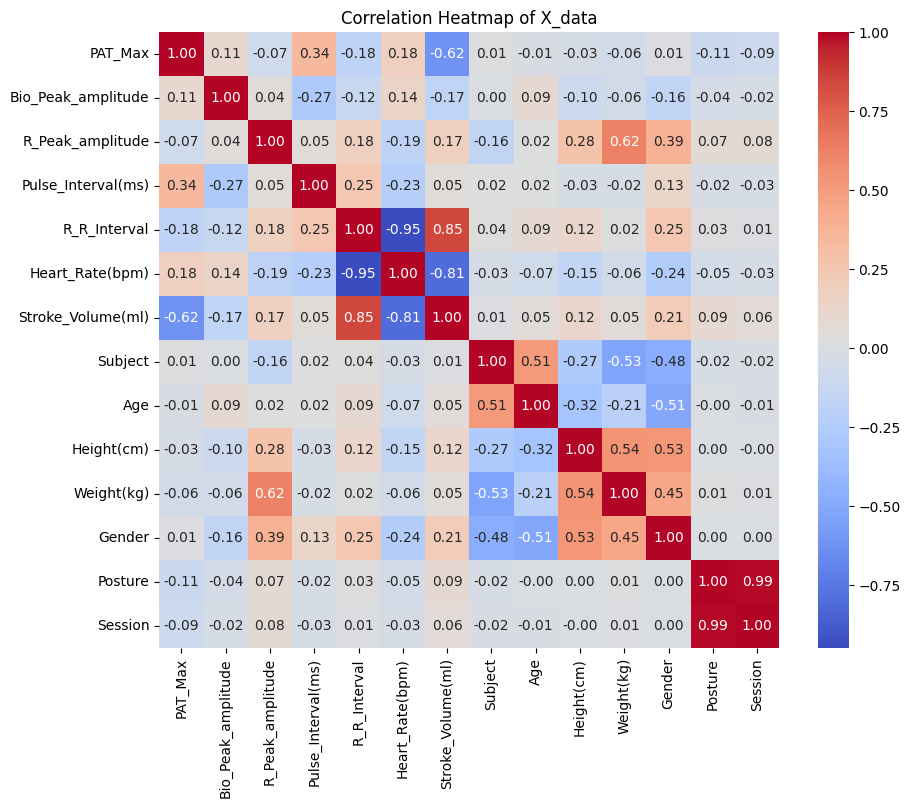

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt
# Select and compute correlation matrix
#selected_data = df[selected_columns]
correlation_matrix = X.corr()

# Create and display the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of X_data')
plt.show()


In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0,shuffle=True)

In [198]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

In [199]:
X_train_scaled = scaler_features.fit_transform(X_train)

In [200]:
X_test_scaled = scaler_features.transform(X_test)

In [201]:
# Scale the target (Glucose_level) for y_train and y_test
y_train_scaled = scaler_target.fit_transform(y_train)
y_test_scaled = scaler_target.transform(y_test)

In [202]:
#write code here
from sklearn.linear_model import LinearRegression

In [203]:
#write code here
lr = LinearRegression()
lr.fit(X_train_scaled,y_train_scaled)

LinearRegression()

In [204]:
#write code here
lr_predict = lr.predict(X_test_scaled)

In [205]:
#write code here
lr_r2_train =lr.predict(X_train_scaled)

In [206]:
# Step 8: Inverse transform X_test, y_test, and the predictions back to their original values
X_test_original = scaler_features.inverse_transform(X_test_scaled)
y_test_original = scaler_target.inverse_transform(y_test_scaled)
y_pred_original = scaler_target.inverse_transform(lr_predict)

In [207]:
from sklearn.metrics import mean_absolute_error
mae1 = mean_absolute_error(y_test_scaled,lr_predict)
print(f"Mean Absolute Error of the tesing data : {mae1}")

Mean Absolute Error of the tesing data : 0.03196112662111012


In [208]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_test_scaled,lr_predict)
print(f"Mean Squared Error of testing data : {mse1}")

Mean Squared Error of testing data : 0.0020124943705398008


In [209]:
# Calculate Mean Squared Error
#mse = mean_squared_error(y_test,lr_predict)
import numpy as np
# Calculate Root Mean Squared Error
rmse1 = np.sqrt(mse1)
print(f"Root Mean Squared Error of testing data : {rmse1}")

Root Mean Squared Error of testing data : 0.04486083336876167


In [210]:
#write code here
#mean squre error
from sklearn.metrics import r2_score
lr_r2_test1= r2_score(y_test_scaled,lr_predict)

In [211]:
from sklearn.metrics import r2_score
lr_r2_train= r2_score(y_train_scaled,lr_r2_train)

In [212]:
#print('R2 score for Linear Regression Taining Data is: ', lr_r2_train)
print('R2 score for Linear Regression Testing Data is: ', lr_r2_test1)

R2 score for Linear Regression Testing Data is:  0.9735337094636809


In [213]:
# Inverse transform the scaled values
y_test_actual = scaler_target .inverse_transform(y_test_scaled)
y_test_predict_actual = scaler_target .inverse_transform(lr_predict)


# Show the model predictions vs actual values
y_test_actual = pd.Series(y_test_actual.flatten(), name='Actual SBP')
y_test_predict_actual = pd.Series(y_test_predict_actual.flatten(), name='Predict SBP')
predictions1 = pd.DataFrame({'Actual SBP': y_test_actual, 'Predict SBP': y_test_predict_actual})
#predictions1

In [214]:
# Add an 'Index' column with automatic sequential values starting from 1
predictions1['Index'] = range(1, len(predictions1) + 1)

# Display the updated DataFrame
predictions1

,Actual SBP,Predict SBP,Index
0,119.000,119.769,1
1,113.000,116.363,2
2,121.000,122.152,3
3,89.000,90.740,4
4,117.000,118.869,5
...,...,...,...
3860,119.000,122.957,3861
3861,148.000,142.529,3862
3862,82.000,83.088,3863
3863,145.000,148.557,3864


The Linear Regression Model Reasult for the Systolic Blood Pressure


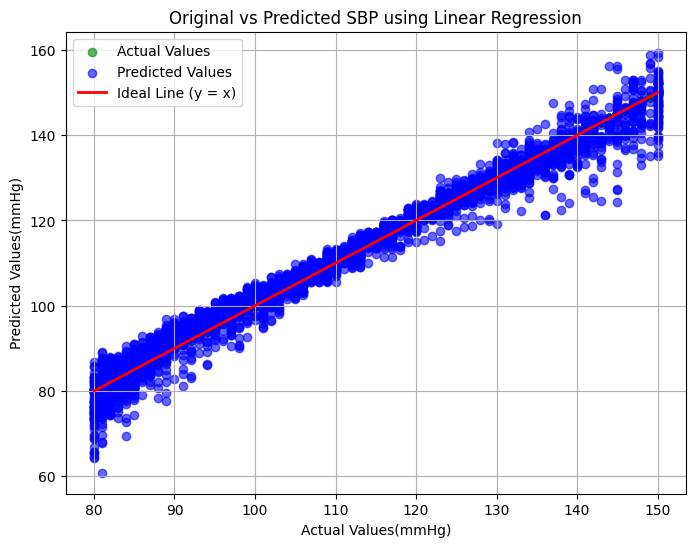

In [215]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `predictions1` is the dataset with actual and predicted values
# Extract actual values and predicted values from the dataset
actual_values = predictions1['Actual SBP']
predicted_values = predictions1['Predict SBP']

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))

# Plot actual values in blue (circle marker)
plt.scatter(actual_values, actual_values, color='green', alpha=0.6, label='Actual Values', marker='o')

# Plot predicted values in green (circle marker)
plt.scatter(actual_values, predicted_values, color='blue', alpha=0.6, label='Predicted Values', marker='o')

# Plot the ideal line y = x (this represents perfect predictions)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], color='red', linewidth=2, label='Ideal Line (y = x)')

# Add titles and labels
print("The Linear Regression Model Reasult for the Systolic Blood Pressure")
plt.title('Original vs Predicted SBP using Linear Regression')
plt.xlabel('Actual Values(mmHg)')
plt.ylabel('Predicted Values(mmHg)')

# Add legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


In [216]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Perform 10-Fold Cross-Validation
cv_r2 = cross_val_score(lr, X_train_scaled, y_train_scaled.ravel(), cv=10, scoring='r2')
cv_rmse = cross_val_score(lr, X_train_scaled, y_train_scaled.ravel(), cv=5, scoring='neg_root_mean_squared_error')

# Display the results
print(f'Cross-Validation R² Scores: {cv_r2}')
print(f'Average R²: {cv_r2.mean()}')
print(f'Cross-Validation RMSE: {-cv_rmse.mean()}')

Cross-Validation R² Scores: [0.97198009 0.97473281 0.97224869 0.97419767 0.97232431 0.97008471
 0.97004656 0.97101677 0.9702691  0.9743117 ]
Average R²: 0.9721212394354248
Cross-Validation RMSE: 0.04557282573896133


### Diastolic Blood Pressure using Linear Regression

In [217]:
df2.columns

Index(['PAT_Max', 'Bio_Peak_amplitude', 'R_Peak_amplitude',
       'Pulse_Interval(ms)', 'R_R_Interval', 'Heart_Rate(bpm)',
       'Systolic_blood_pressure (mmHg)', 'Diastolic_blood_pressure (mmHg)',
       'Stroke_Volume(ml)', 'Subject', 'Age', 'Height(cm)', 'Weight(kg)',
       'Gender', 'Posture', 'Session'],
      dtype='object')

In [218]:
df2.drop(['Systolic_blood_pressure (mmHg)'], axis=1, inplace=True)


In [219]:
df2

,PAT_Max,Bio_Peak_amplitude,R_Peak_amplitude,Pulse_Interval(ms),R_R_Interval,Heart_Rate(bpm),Diastolic_blood_pressure (mmHg),Stroke_Volume(ml),Subject,Age,Height(cm),Weight(kg),Gender,Posture,Session
0,234.000,-93.352,21.937,878.000,644.000,93,78,54.096,1,44,165,100,0,1,1
1,535.000,-54.738,16.821,941.000,640.000,93,52,39.680,1,44,165,100,0,1,1
2,328.000,197.768,22.513,445.000,652.000,92,65,46.944,1,44,165,100,0,1,1
3,279.000,88.273,22.542,747.000,520.000,115,71,39.520,1,44,165,100,0,1,1
4,510.000,143.397,21.878,898.000,667.000,89,53,41.354,1,44,165,100,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12876,454.000,115.180,33.019,984.000,779.000,77,56,51.414,12,58,175,83,0,8,5
12877,290.000,271.369,36.333,448.000,612.000,98,69,45.288,12,58,175,83,0,8,5
12878,231.000,291.205,35.488,647.000,706.000,84,77,59.304,12,58,175,83,0,8,5
12879,496.000,213.672,30.598,971.000,706.000,84,54,45.184,12,58,175,83,0,8,5


In [220]:
X = df2.drop(['Diastolic_blood_pressure (mmHg)'], axis=1)
Y = df2[['Diastolic_blood_pressure (mmHg)']]

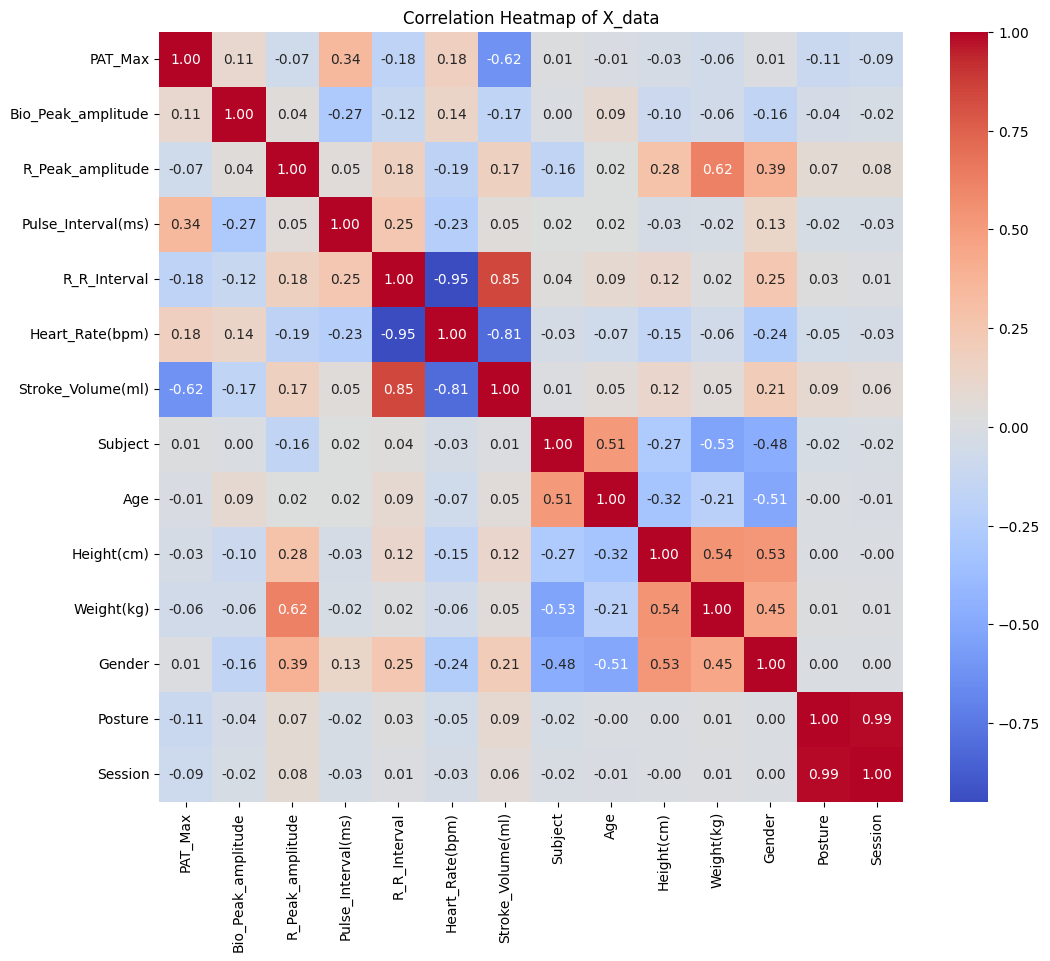

In [221]:
# Select and compute correlation matrix
#selected_data = df[selected_columns]
correlation_matrix = X.corr()

# Create and display the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of X_data')
plt.show()

In [222]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0,shuffle=True )

In [223]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

In [224]:
X_train_scaled = scaler_features.fit_transform(X_train)

In [225]:
X_test_scaled = scaler_features.transform(X_test)

In [226]:
# Scale the target (Glucose_level) for y_train and y_test
y_train_scaled = scaler_target.fit_transform(y_train)
y_test_scaled = scaler_target.transform(y_test)

In [227]:
#write code here
from sklearn.linear_model import LinearRegression

In [228]:
#write code here
lr = LinearRegression()
lr.fit(X_train_scaled,y_train_scaled)

LinearRegression()

In [229]:
#write code here
lr_predict = lr.predict(X_test_scaled)

In [230]:
#write code here
lr_r2_train =lr.predict(X_train_scaled)

In [231]:
# Step 8: Inverse transform X_test, y_test, and the predictions back to their original values
X_test_original = scaler_features.inverse_transform(X_test_scaled)
y_test_original = scaler_target.inverse_transform(y_test_scaled)
y_pred_original = scaler_target.inverse_transform(lr_predict)

In [232]:
from sklearn.metrics import mean_absolute_error
mae2 = mean_absolute_error(y_test_scaled,lr_predict)
print(f"Mean Absolute Error of the tesing data : {mae2}")

Mean Absolute Error of the tesing data : 0.03466356913703549


In [233]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_test_scaled,lr_predict)
print(f"Mean Squared Error of testing data : {mse2}")

Mean Squared Error of testing data : 0.0022495286843406187


In [234]:
# Calculate Mean Squared Error
#mse = mean_squared_error(y_test,lr_predict)
import numpy as np
# Calculate Root Mean Squared Error
rmse2 = np.sqrt(mse2)
print(f"Root Mean Squared Error of testing data : {rmse2}")

Root Mean Squared Error of testing data : 0.04742919653905829


In [235]:
#write code here
#mean squre error
from sklearn.metrics import r2_score
lr_r2_test2= r2_score(y_test_scaled,lr_predict)

In [236]:
from sklearn.metrics import r2_score
lr_r2_train= r2_score(y_train_scaled,lr_r2_train)

In [237]:
#print('R2 score for Linear Regression Training Data is: ', lr_r2_train)
print('R2 score for Linear Regression Testing Data is: ', lr_r2_test2)

R2 score for Linear Regression Testing Data is:  0.9704444434895034


In [238]:
# Inverse transform the scaled values
y_test_actual = scaler_target .inverse_transform(y_test_scaled)
y_test_predict_actual = scaler_target .inverse_transform(lr_predict)


# Show the model predictions vs actual values
y_test_actual = pd.Series(y_test_actual.flatten(), name='Actual DBP')
y_test_predict_actual = pd.Series(y_test_predict_actual.flatten(), name='Predicted DBP')
predictions2 = pd.DataFrame({'Actual DBP': y_test_actual, 'Predict DBP': y_test_predict_actual})
#predictions2

# Assuming predictions1 is your original dataframe
# Filter rows where both 'Actual Systolic Blood Pressure' and 'Model Predicted Systolic Blood Pressure' are >= 90
#predictions2 = predictions2[(predictions2['Actual Diastolic Blood Pressure'] >= 40) &
                            #(predictions2['Model Predicted Diastolic Blood Pressure'] >= 40)]

# Display the filtered predictions1 dataset
#predictions2

In [239]:
# Add an 'Index' column with automatic sequential values starting from 1
predictions2['Index'] = range(1, len(predictions2) + 1)

# Display the updated DataFrame
#print(predictions1)

In [240]:
predictions2

,Actual DBP,Predict DBP,Index
0,78.000,78.304,1
1,73.000,75.854,2
2,79.000,79.927,3
3,56.000,57.521,4
4,76.000,77.662,5
...,...,...,...
3860,77.000,80.507,3861
3861,98.000,94.435,3862
3862,51.000,52.014,3863
3863,97.000,98.706,3864


The Linear Regression Model Reasult for the Diastolic Blood Pressure


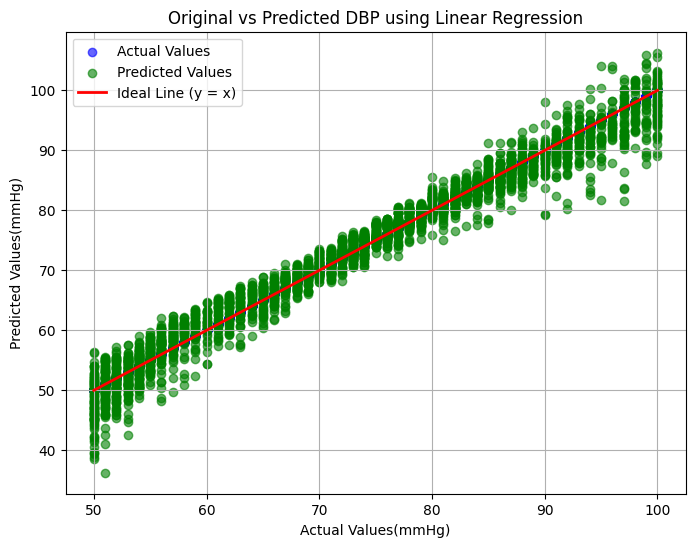

In [241]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `predictions1` is the dataset with actual and predicted values
# Extract actual values and predicted values from the dataset
actual_values = predictions2['Actual DBP']
predicted_values = predictions2['Predict DBP']

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))

# Plot actual values in blue (circle marker)
plt.scatter(actual_values, actual_values, color='blue', alpha=0.6, label='Actual Values', marker='o')

# Plot predicted values in green (circle marker)
plt.scatter(actual_values, predicted_values, color='green', alpha=0.6, label='Predicted Values', marker='o')

# Plot the ideal line y = x (this represents perfect predictions)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], color='red', linewidth=2, label='Ideal Line (y = x)')

# Add titles and labels
print("The Linear Regression Model Reasult for the Diastolic Blood Pressure")
plt.title('Original vs Predicted DBP using Linear Regression')
plt.xlabel('Actual Values(mmHg)')
plt.ylabel('Predicted Values(mmHg)')

# Add legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


In [242]:
# Merge the two datasets on 'ID' column
merged_predictions = pd.merge(predictions1,predictions2,on='Index',how='left')

# Remove the 'Age' column
merged_predictions = merged_predictions.drop('Index', axis=1)

# Display the merged dataset
print("The Reasult of the Linear Regression in SBP and DBP")
merged_predictions

The Reasult of the Linear Regression in SBP and DBP


,Actual SBP,Predict SBP,Actual DBP,Predict DBP
0,119.000,119.769,78.000,78.304
1,113.000,116.363,73.000,75.854
2,121.000,122.152,79.000,79.927
3,89.000,90.740,56.000,57.521
4,117.000,118.869,76.000,77.662
...,...,...,...,...
3860,119.000,122.957,77.000,80.507
3861,148.000,142.529,98.000,94.435
3862,82.000,83.088,51.000,52.014
3863,145.000,148.557,97.000,98.706


### Systolic Blood Pressure using  Convolutional Neural Netwrok Model

In [243]:
df3.drop(['Diastolic_blood_pressure (mmHg)'], axis=1, inplace=True)

In [244]:
df3

,PAT_Max,Bio_Peak_amplitude,R_Peak_amplitude,Pulse_Interval(ms),R_R_Interval,Heart_Rate(bpm),Systolic_blood_pressure (mmHg),Stroke_Volume(ml),Subject,Age,Height(cm),Weight(kg),Gender,Posture,Session
0,234.000,-93.352,21.937,878.000,644.000,93,120,54.096,1,44,165,100,0,1,1
1,535.000,-54.738,16.821,941.000,640.000,93,83,39.680,1,44,165,100,0,1,1
2,328.000,197.768,22.513,445.000,652.000,92,101,46.944,1,44,165,100,0,1,1
3,279.000,88.273,22.542,747.000,520.000,115,109,39.520,1,44,165,100,0,1,1
4,510.000,143.397,21.878,898.000,667.000,89,84,41.354,1,44,165,100,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12876,454.000,115.180,33.019,984.000,779.000,77,89,51.414,12,58,175,83,0,8,5
12877,290.000,271.369,36.333,448.000,612.000,98,106,45.288,12,58,175,83,0,8,5
12878,231.000,291.205,35.488,647.000,706.000,84,119,59.304,12,58,175,83,0,8,5
12879,496.000,213.672,30.598,971.000,706.000,84,86,45.184,12,58,175,83,0,8,5


In [245]:
df3.columns

Index(['PAT_Max', 'Bio_Peak_amplitude', 'R_Peak_amplitude',
       'Pulse_Interval(ms)', 'R_R_Interval', 'Heart_Rate(bpm)',
       'Systolic_blood_pressure (mmHg)', 'Stroke_Volume(ml)', 'Subject', 'Age',
       'Height(cm)', 'Weight(kg)', 'Gender', 'Posture', 'Session'],
      dtype='object')

In [246]:
X = df3.drop(['Systolic_blood_pressure (mmHg)'], axis=1)
y = df3[['Systolic_blood_pressure (mmHg)']]

In [247]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
#np.random.seed(42)

In [248]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [249]:
# Convert DataFrame to NumPy arrays if they are DataFrames
X_train = np.array(X_train)
X_test = np.array(X_test)

In [250]:
# Reshape data for CNN (1D convolution expects input shape: [samples, time_steps, features])
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [251]:
# Scale the target variable (optional, for better performance)
y_train = np.array(y_train).reshape(-1, 1)  # Convert y_train to numpy array and reshape
y_test = np.array(y_test).reshape(-1, 1)    # Convert y_test to numpy array and reshape


In [252]:
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train).flatten()  # Flatten after scaling
y_test = y_scaler.transform(y_test).flatten()        # Flatten after scaling

In [253]:
# Build CNN model
model1 = Sequential()
#model1.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model1.add(Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model1.add(MaxPooling1D(2))
model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1))  # Regression output (no activation function)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [254]:
# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error')

In [255]:
from tensorflow.keras.callbacks import EarlyStopping, Callback
# Define an in-memory callback for saving the model weights
class InMemoryCheckpoint(Callback):
    def __init__(self):
        super().__init__()
        self.best_weights = None

    def on_epoch_end(self, epoch, logs=None):
        # Save the best weights at the end of each epoch
        if self.best_weights is None or logs['val_loss'] < self.best_weights[0]:
            self.best_weights = (logs['val_loss'], self.model.get_weights())

    def restore_best_weights(self):
        # Restore the best weights to the model
        if self.best_weights:
            self.model.set_weights(self.best_weights[1])

In [256]:
early_stopping1 = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [257]:
in_memory_checkpoint1 = InMemoryCheckpoint()

In [258]:
# Train the model with the callbacks
history = model1.fit(
    X_train, y_train,
    epochs=15,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping1, in_memory_checkpoint1]
)

Epoch 1/15
644/644 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 926.9102 - val_loss: 2.2106
Epoch 2/15
644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 17.9755 - val_loss: 0.6310
Epoch 3/15
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.6670 - val_loss: 1.4542
Epoch 4/15
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.1712 - val_loss: 0.6663
Epoch 5/15
644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.7682 - val_loss: 0.2489
Epoch 6/15
644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.7010 - val_loss: 0.3248
Epoch 7/15
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6631 - val_loss: 0.3777
Epoch 8/15
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5880 - val_loss: 0.2242
Epoch 9/15
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6509 - val_loss: 0.3720
Epoch 10/15
644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.7038 - val_loss: 0.1599
Epoch 11/15
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7154 - val_loss: 0.2855
Epoch 12/15
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/s

In [259]:
# After training, restore the best weights
in_memory_checkpoint1.restore_best_weights()


In [260]:
# Evaluate the model
loss = model1.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1211
Test Loss: 0.12401576340198517


In [261]:
# CNN predictions
y_pred_cnn = model1.predict(X_test)

# Ensure predictions are in the correct shape for regression (flatten)
y_pred_cnn_flat = y_pred_cnn.flatten()


81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [262]:
# Calculate Mean Absolute Error (MAE)
mae3 = mean_absolute_error(y_test, y_pred_cnn)
print(f"Mean Absolute Error (MAE): {mae3}")

# Calculate Mean Squared Error (MSE)
mse3 = mean_squared_error(y_test, y_pred_cnn)
print(f"Mean Squared Error (MSE): {mse3}")

# Calculate Root Mean Squared Error (RMSE)
rmse3 = np.sqrt(mse3)
print(f"Root Mean Squared Error (RMSE): {rmse3}")

# Calculate R-squared (R2) score
lr_r2_test3 = r2_score(y_test, y_pred_cnn)
print(f"R-squared (R2) score: {lr_r2_test3}")

Mean Absolute Error (MAE): 0.2690311022784675
Mean Squared Error (MSE): 0.12401573769701021
Root Mean Squared Error (RMSE): 0.35215868255235483
R-squared (R2) score: 0.8742766386742177


In [263]:
import pandas as pd
import numpy as np

# Assuming 'scaler_target' is the scaler used for normalizing the target (e.g., MinMaxScaler, StandardScaler)
# Assuming `y_test_scaled` is the scaled actual target values from the test set.
# Assuming `y_pred_cnn_flat` is the CNN model's predicted values on the test set.

# Reshape y_test to 2D before inverse transformation
y_test_reshaped = y_test.reshape(-1, 1)  # Reshape to 2D (required by the scaler)
y_test_actual = y_scaler.inverse_transform(y_test_reshaped)  # Inverse transform the actual target values

# Reshape y_pred_cnn_flat to 2D before applying inverse_transform
y_pred_cnn_flat_reshaped = y_pred_cnn_flat.reshape(-1, 1)  # Reshape to 2D (required by the scaler)
y_test_predict_actual_cnn = y_scaler.inverse_transform(y_pred_cnn_flat_reshaped)  # Inverse transform CNN's predicted values

# Flatten the results (if they are multi-dimensional) to ensure they are 1D for comparison
y_test_actual_flat = y_test_actual.flatten()
y_test_predict_actual_cnn_flat = y_test_predict_actual_cnn.flatten()

# Convert the results into pandas Series for easy comparison
y_test_actual_series = pd.Series(y_test_actual_flat, name='Actual SBP')
y_test_predict_actual_cnn_series = pd.Series(y_test_predict_actual_cnn_flat, name='Predict SBP')

# Create a DataFrame for comparison
predictions_cnn1 = pd.DataFrame({
    'Actual SBP': y_test_actual_series,
    'Predict SBP': y_test_predict_actual_cnn_series
})

# Format the values to show 2 decimal places for consistency
predictions_cnn1['Actual SBP'] = predictions_cnn1['Actual SBP'].round(2)
predictions_cnn1['Predict SBP'] = predictions_cnn1['Predict SBP'].round(2)

# Show the predictions with formatted values
#print(predictions_cnn1)


In [264]:
# Add an 'Index' column with automatic sequential values starting from 1
predictions_cnn1['Index'] = range(1, len(predictions_cnn1) + 1)

predictions_cnn1

,Actual SBP,Predict SBP,Index
0,119.000,120.150,1
1,143.000,148.100,2
2,116.000,120.520,3
3,81.000,80.140,4
4,82.000,83.530,5
...,...,...,...
2572,90.000,104.620,2573
2573,115.000,118.040,2574
2574,109.000,113.200,2575
2575,103.000,108.330,2576


In [265]:
predictions_cnn1.columns

Index(['Actual SBP', 'Predict SBP', 'Index'], dtype='object')

The CNN Model Reasult for the Systolic Blood Pressure


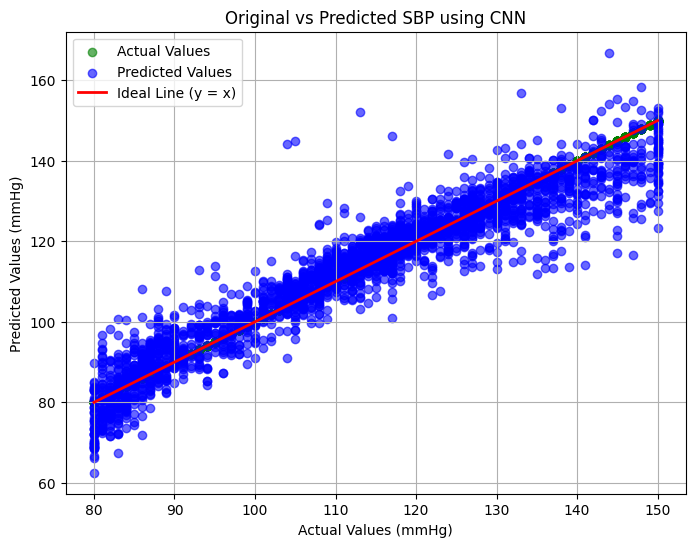

In [266]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assuming `y_test_actual_series` and `y_test_predict_actual_cnn_series` are the actual and predicted values
# Create a DataFrame for comparison
predictions_cnn1 = pd.DataFrame({
    'Actual SBP': y_test_actual_series,
    'Predict SBP': y_test_predict_actual_cnn_series
})

# Format the values to show 2 decimal places for consistency
predictions_cnn1['Actual SBP'] = predictions_cnn1['Actual SBP'].apply(lambda x: f"{x:.2f}")
predictions_cnn1['Predict SBP'] = predictions_cnn1['Predict SBP'].apply(lambda x: f"{x:.2f}")

# Extract actual and predicted values as arrays for the linear regression
y_test = predictions_cnn1['Actual SBP'].astype(float).to_numpy()  # Convert to NumPy array
y_pred_cnn_flat = predictions_cnn1['Predict SBP'].astype(float).to_numpy()

# Perform linear regression on CNN predictions
lr = LinearRegression()
lr.fit(y_pred_cnn_flat.reshape(-1, 1), y_test)  # Reshape for the linear regression model

# Predict values using linear regression
y_lr_pred = lr.predict(y_pred_cnn_flat.reshape(-1, 1))

# Plotting the regression graph
plt.figure(figsize=(8, 6))

# Plot actual values (green color)
plt.scatter(y_test, y_test, color='green', label='Actual Values', alpha=0.6, marker='o')  # Actual values in green

# Plot predicted values (blue color)
plt.scatter(y_test, y_lr_pred, color='blue', label='Predicted Values', alpha=0.6, marker='o')  # Predicted values in blue

# Plot the regression line (ideal line)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Line (y = x)')

# Add titles and labels
print('The CNN Model Reasult for the Systolic Blood Pressure')
plt.title('Original vs Predicted SBP using CNN')
plt.xlabel('Actual Values (mmHg)')
plt.ylabel('Predicted Values (mmHg)')

# Add a legend to the graph
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

# Optionally, display the formatted DataFrame
#print(predictions_cnn1)


### Distolic Blood Pressure using Convolutional Neural Netwrok Model

In [267]:
df4.drop(['Systolic_blood_pressure (mmHg)'], axis=1, inplace=True)


In [268]:
df4

,PAT_Max,Bio_Peak_amplitude,R_Peak_amplitude,Pulse_Interval(ms),R_R_Interval,Heart_Rate(bpm),Diastolic_blood_pressure (mmHg),Stroke_Volume(ml),Subject,Age,Height(cm),Weight(kg),Gender,Posture,Session
0,234.000,-93.352,21.937,878.000,644.000,93,78,54.096,1,44,165,100,0,1,1
1,535.000,-54.738,16.821,941.000,640.000,93,52,39.680,1,44,165,100,0,1,1
2,328.000,197.768,22.513,445.000,652.000,92,65,46.944,1,44,165,100,0,1,1
3,279.000,88.273,22.542,747.000,520.000,115,71,39.520,1,44,165,100,0,1,1
4,510.000,143.397,21.878,898.000,667.000,89,53,41.354,1,44,165,100,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12876,454.000,115.180,33.019,984.000,779.000,77,56,51.414,12,58,175,83,0,8,5
12877,290.000,271.369,36.333,448.000,612.000,98,69,45.288,12,58,175,83,0,8,5
12878,231.000,291.205,35.488,647.000,706.000,84,77,59.304,12,58,175,83,0,8,5
12879,496.000,213.672,30.598,971.000,706.000,84,54,45.184,12,58,175,83,0,8,5


In [269]:
df4.columns

Index(['PAT_Max', 'Bio_Peak_amplitude', 'R_Peak_amplitude',
       'Pulse_Interval(ms)', 'R_R_Interval', 'Heart_Rate(bpm)',
       'Diastolic_blood_pressure (mmHg)', 'Stroke_Volume(ml)', 'Subject',
       'Age', 'Height(cm)', 'Weight(kg)', 'Gender', 'Posture', 'Session'],
      dtype='object')

In [270]:
X = df4.drop(['Diastolic_blood_pressure (mmHg)'], axis=1)
y = df4[['Diastolic_blood_pressure (mmHg)']]

In [271]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
np.random.seed(42)

In [272]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [273]:
# Convert DataFrame to NumPy arrays if they are DataFrames
X_train = np.array(X_train)
X_test = np.array(X_test)

In [274]:
# Reshape data for CNN (1D convolution expects input shape: [samples, time_steps, features])
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [275]:
# Scale the target variable (optional, for better performance)
y_train = np.array(y_train).reshape(-1, 1)  # Convert y_train to numpy array and reshape
y_test = np.array(y_test).reshape(-1, 1)    # Convert y_test to numpy array and reshape

In [276]:
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train).flatten()  # Flatten after scaling
y_test = y_scaler.transform(y_test).flatten()        # Flatten after scaling

In [277]:
# Build CNN model
model2 = Sequential()
#model2.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model2.add(Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model2.add(MaxPooling1D(2))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1))  # Regression output (no activation function)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [278]:
# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')


In [279]:
from tensorflow.keras.callbacks import EarlyStopping, Callback
# Define an in-memory callback for saving the model weights
class InMemoryCheckpoint(Callback):
    def __init__(self):
        super().__init__()
        self.best_weights = None

    def on_epoch_end(self, epoch, logs=None):
        # Save the best weights at the end of each epoch
        if self.best_weights is None or logs['val_loss'] < self.best_weights[0]:
            self.best_weights = (logs['val_loss'], self.model.get_weights())

    def restore_best_weights(self):
        # Restore the best weights to the model
        if self.best_weights:
            self.model.set_weights(self.best_weights[1])

In [280]:
# Train the model with early stopping
early_stopping2 = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)


In [281]:
in_memory_checkpoint2 = InMemoryCheckpoint()

In [282]:
# Train the model with the callbacks
history = model2.fit(
    X_train, y_train,
    epochs=15,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping2, in_memory_checkpoint2]
)

Epoch 1/15
644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 905.8167 - val_loss: 2.2689
Epoch 2/15
644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 13.3115 - val_loss: 0.6349
Epoch 3/15
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.9024 - val_loss: 0.2146
Epoch 4/15
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.3970 - val_loss: 0.4876
Epoch 5/15
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.1868 - val_loss: 0.5938
Epoch 6/15
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6560 - val_loss: 0.1789
Epoch 7/15
644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.6432 - val_loss: 0.2719
Epoch 8/15
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.2449 - val_loss: 0.2490
Epoch 9/15
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.9340 - val_loss: 0.2093
Epoch 10/15
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.9574 - val_loss: 0.4125
Epoch 11/15
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.7784 - val_loss: 0.6877
Epoch 12/15
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/s

In [283]:
# Evaluate the model
loss = model2.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")


81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1795
Test Loss: 0.17887844145298004


In [284]:
# CNN predictions
y_pred_cnn = model2.predict(X_test)

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [285]:
# Ensure predictions are in the correct shape for regression (flatten)
y_pred_cnn_flat = y_pred_cnn.flatten()

In [286]:
# Calculate Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae4 = mean_absolute_error(y_test, y_pred_cnn)
print(f"Mean Absolute Error (MAE): {mae4}")


# Calculate Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse4 = mean_squared_error(y_test, y_pred_cnn)
print(f"Mean Squared Error (MSE): {mse4}")


# Calculate Root Mean Squared Error (RMSE)
import numpy as np
rmse4 = np.sqrt(mse4)
print(f"Root Mean Squared Error (RMSE): {rmse4}")

# Calculate R-squared (R2) score
from sklearn.metrics import r2_score
lr_r2_test4 = r2_score(y_test, y_pred_cnn)
print(f"R-squared (R2) score: {lr_r2_test4}")

Mean Absolute Error (MAE): 0.32761628289884004
Mean Squared Error (MSE): 0.17887844230463473
Root Mean Squared Error (RMSE): 0.4229402349087099
R-squared (R2) score: 0.8186658572867987


In [287]:
import pandas as pd
import numpy as np

# Assuming 'scaler_target' is the scaler used for normalizing the target (e.g., MinMaxScaler, StandardScaler)
# Assuming `y_test_scaled` is the scaled actual target values from the test set.
# Assuming `y_pred_cnn_flat` is the CNN model's predicted values on the test set.

# Reshape y_test to 2D before inverse transformation
y_test_reshaped = y_test.reshape(-1, 1)  # Reshape to 2D (required by the scaler)
y_test_actual = y_scaler.inverse_transform(y_test_reshaped)  # Inverse transform the actual target values

# Reshape y_pred_cnn_flat to 2D before applying inverse_transform
y_pred_cnn_flat_reshaped = y_pred_cnn_flat.reshape(-1, 1)  # Reshape to 2D (required by the scaler)
y_test_predict_actual_cnn = y_scaler.inverse_transform(y_pred_cnn_flat_reshaped)  # Inverse transform CNN's predicted values

# Flatten the results (if they are multi-dimensional) to ensure they are 1D for comparison
y_test_actual_flat = y_test_actual.flatten()
y_test_predict_actual_cnn_flat = y_test_predict_actual_cnn.flatten()

# Convert the results into pandas Series for easy comparison
y_test_actual_series = pd.Series(y_test_actual_flat, name='Actual DBP')
y_test_predict_actual_cnn_series = pd.Series(y_test_predict_actual_cnn_flat, name='Predict DBP')

# Create a DataFrame for comparison
predictions_cnn2 = pd.DataFrame({
    'Actual DBP': y_test_actual_series,
    'Predict DBP': y_test_predict_actual_cnn_series
})

# Format the values to show 2 decimal places for consistency
predictions_cnn2['Actual DBP'] = predictions_cnn2['Actual DBP'].round(2)
predictions_cnn2['Predict DBP'] = predictions_cnn2['Predict DBP'].round(2)

# Show the predictions with formatted values
#print(predictions_cnn1)

In [288]:
predictions_cnn2['Index'] = range(1, len(predictions_cnn2) + 1)

predictions_cnn2

,Actual DBP,Predict DBP,Index
0,78.000,77.680,1
1,95.000,88.860,2
2,75.000,77.410,3
3,51.000,57.140,4
4,52.000,53.190,5
...,...,...,...
2572,57.000,57.380,2573
2573,75.000,76.770,2574
2574,70.000,74.200,2575
2575,66.000,71.360,2576


The CNN Model Reasult for the Diastolic Blood Pressure


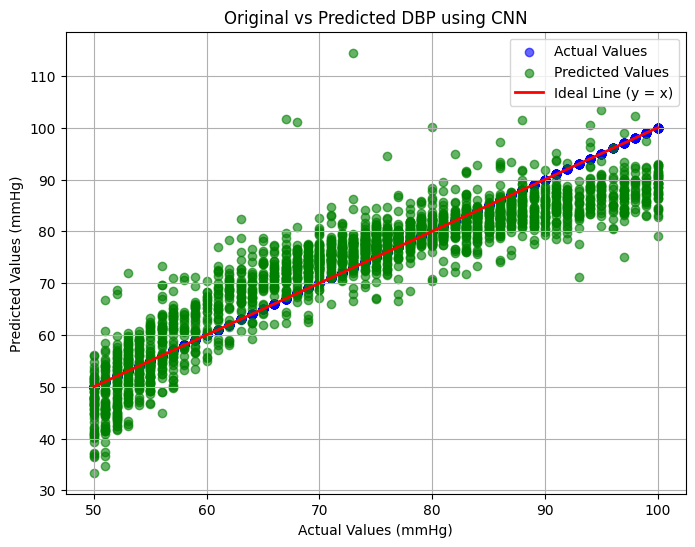

In [289]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assuming `y_test_actual_series` and `y_test_predict_actual_cnn_series` are the actual and predicted values
# Create a DataFrame for comparison
predictions_cnn2 = pd.DataFrame({
    'Actual DBP': y_test_actual_series,
    'Predict DBP': y_test_predict_actual_cnn_series
})

# Format the values to show 2 decimal places for consistency
predictions_cnn2['Actual DBP'] = predictions_cnn2['Actual DBP'].apply(lambda x: f"{x:.2f}")
predictions_cnn2['Predict DBP'] = predictions_cnn2['Predict DBP'].apply(lambda x: f"{x:.2f}")

# Extract actual and predicted values as arrays for the linear regression
y_test = predictions_cnn2['Actual DBP'].astype(float).to_numpy()  # Convert to NumPy array
y_pred_cnn_flat = predictions_cnn2['Predict DBP'].astype(float).to_numpy()

# Perform linear regression on CNN predictions
lr = LinearRegression()
lr.fit(y_pred_cnn_flat.reshape(-1, 1), y_test)  # Reshape for the linear regression model

# Predict values using linear regression
y_lr_pred = lr.predict(y_pred_cnn_flat.reshape(-1, 1))

# Plotting the regression graph
plt.figure(figsize=(8, 6))

# Plot actual values (green color)
plt.scatter(y_test, y_test, color='blue', label='Actual Values', alpha=0.6, marker='o')  # Actual values in green

# Plot predicted values (blue color)
plt.scatter(y_test, y_lr_pred, color='green', label='Predicted Values', alpha=0.6, marker='o')  # Predicted values in blue

# Plot the regression line (ideal line)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Line (y = x)')

# Add titles and labels
print('The CNN Model Reasult for the Diastolic Blood Pressure')
plt.title('Original vs Predicted DBP using CNN')
plt.xlabel('Actual Values (mmHg)')
plt.ylabel('Predicted Values (mmHg)')

# Add a legend to the graph
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

# Optionally, display the formatted DataFrame
#print(predictions_cnn1)


In [290]:
# Add an 'Index' column with automatic sequential values starting from 1
predictions_cnn1['Index'] = range(1, len(predictions_cnn1) + 1)

#predictions_cnn1

In [291]:
predictions_cnn2['Index'] = range(1, len(predictions_cnn2) + 1)

#predictions_cnn2

In [292]:
# Merge the two datasets on 'ID' column
merged_predictions_cnn = pd.merge(predictions_cnn1,predictions_cnn2,on='Index',how='left')

# Display the merged dataset
merged_predictions_cnn.drop('Index', axis=1, inplace=True)
print("The reasult of the CNN in SBP and DBP")
merged_predictions_cnn

The reasult of the CNN in SBP and DBP


,Actual SBP,Predict SBP,Actual DBP,Predict DBP
0,119.00,120.15,78.00,77.68
1,143.00,148.10,95.00,88.86
2,116.00,120.52,75.00,77.41
3,81.00,80.14,51.00,57.14
4,82.00,83.53,52.00,53.19
...,...,...,...,...
2572,90.00,104.62,57.00,57.38
2573,115.00,118.04,75.00,76.77
2574,109.00,113.20,70.00,74.20
2575,103.00,108.33,66.00,71.36


### Combine All Reasult

In [293]:
# Create the performance metrics DataFrame
metrics = pd.DataFrame({
    'Metric': ['Mean Absolute Error', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R² Score'],
    'Linear Regression Systolic': [mae1, mse1, rmse1, lr_r2_test1],
    'Linear Regression Diastolic': [mae2, mse2, rmse2, lr_r2_test2],
    'CNN Systolic': [mae3, mse3, rmse3, lr_r2_test3],
    'CNN Diastolic': [mae4, mse4, rmse4, lr_r2_test4]
})

# Set 'Metric' column as the index
metrics.set_index('Metric', inplace=True)

# Display the predictions table with the performance metrics in 2D format
print("Performance Metrics (2D Format):")
metrics

Performance Metrics (2D Format):


,Linear Regression Systolic,Linear Regression Diastolic,CNN Systolic,CNN Diastolic
Metric,,,,
Mean Absolute Error,0.032,0.035,0.269,0.328
Mean Squared Error (MSE),0.002,0.002,0.124,0.179
Root Mean Squared Error (RMSE),0.045,0.047,0.352,0.423
R² Score,0.974,0.970,0.874,0.819
